In [1]:
from data.download import download

# Get daily grayscale rainfall data (https://neo.gsfc.nasa.gov/archive/gs/GPM_3IMERGDL/)
imgs_dir = download()

In [2]:
from glob import glob

# Explore with last 10 images
imgs_list = sorted(glob(imgs_dir + '/*.PNG'))[-10:]

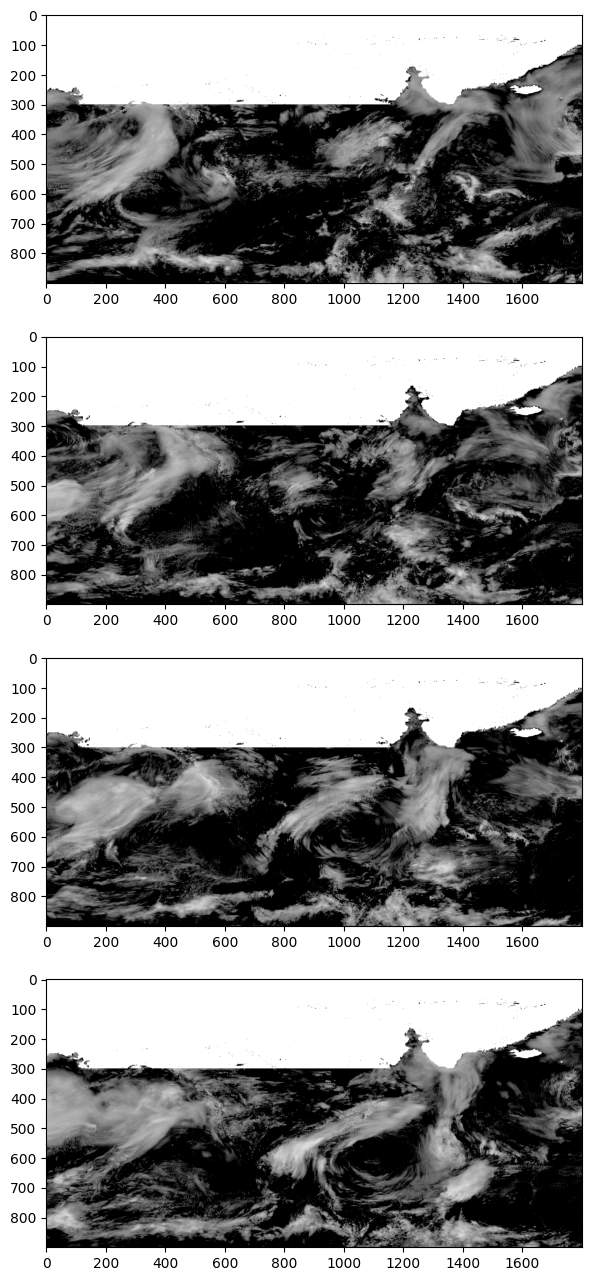

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Plot last 4 as EDA
limgs = np.array([
                    plt.imread(imgs_list[-i]) for i in [4,3,2,1]
                    ])


fig, axs = plt.subplots(4, 1, figsize=(8, 16))
for i, (img, ax) in enumerate(zip(limgs, axs.flatten())):
    plt.subplot(4, 1, i+1)
    img = img[:img.shape[0]//2, :img.shape[1]//2] # Take North Western quadrant
    plt.imshow(img, cmap='gray')

In [4]:
# Convert images to array
imgs = np.array([
                    plt.imread(img) for img in imgs_list
                    ])

# Take North West quadrant (crop lattitude at 300 (65\deg I think) as well)
# Sample geotiff may be best (though inelegant)
original_shape = imgs[0].shape
print(imgs.shape)
imgs = imgs[:, :original_shape[0]//2, 300:original_shape[1]//2]
imgs.shape

(10, 1800, 3600)


(10, 900, 1500)

In [6]:
import torch
from torch import nn


class ConvLSTM(nn.Module):
    def __init__(self):
        pass